In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import datetime as dt
from matplotlib import dates as mdates
import os
import glob

In [2]:
# function to format y-axis units
def thousands(x, pos):
    """formats count in thousands"""
    new_x = x / 1000
    return f"{new_x:,.0f}K"

In [3]:
f = "Data/Chicago-Crime*.csv"
crime_data = sorted(glob.glob(f))
crime_data

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [4]:
df = pd.concat([pd.read_csv(f, lineterminator='\n') for f in crime_data])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [5]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')
df['Date']

0        2001-01-01 01:00:00
1        2001-01-01 13:00:00
2        2001-01-01 13:00:00
3        2001-01-01 01:00:00
4        2001-01-01 01:00:00
                 ...        
238853   2022-12-31 12:50:00
238854   2022-12-31 12:50:00
238855   2022-12-31 00:52:00
238856   2022-12-31 12:52:00
238857   2022-12-31 12:59:00
Name: Date, Length: 7713109, dtype: datetime64[ns]

In [6]:
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [7]:
df_conv = df.copy()
df_conv

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [8]:
df_conv = df_conv.resample("D").sum()
df_conv

C:\Users\romo_\AppData\Local\Temp\ipykernel_15656\2114885317.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_conv = df_conv.resample("D").sum()


,ID,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,
2001-01-01,4011740634,400,378,2267987,21147.0,8194.0,72641.077994,-152199.715024
2001-01-02,1545846568,383,187,1404493,12797.0,147.0,47664.670569,-99856.853277
2001-01-03,1542074517,343,197,1462886,13359.0,132.0,48045.805839,-100651.350927
2001-01-04,1555657957,377,179,1397040,12994.0,0.0,48785.523718,-102222.916683
2001-01-05,1701884634,415,200,1530155,14044.0,156.0,52769.463977,-110554.590960
...,...,...,...,...,...,...,...,...
2022-12-27,7543189950,70,96,694723,6812.0,14192.0,21427.078656,-44887.568351
2022-12-28,7983384637,63,112,697152,6830.0,14030.0,22592.581721,-47339.899182
2022-12-29,8358666625,66,107,718511,7037.0,14292.0,23639.979313,-49528.016672


## Stakeholder Questions to Answer

#### Topic 1) Comparing Police Districts 
 * 
Which district had the most crimes in 2022?
 * 
Which had the least?

In [9]:
df_district = df.loc['2022'].groupby("District").count()['Primary Type']

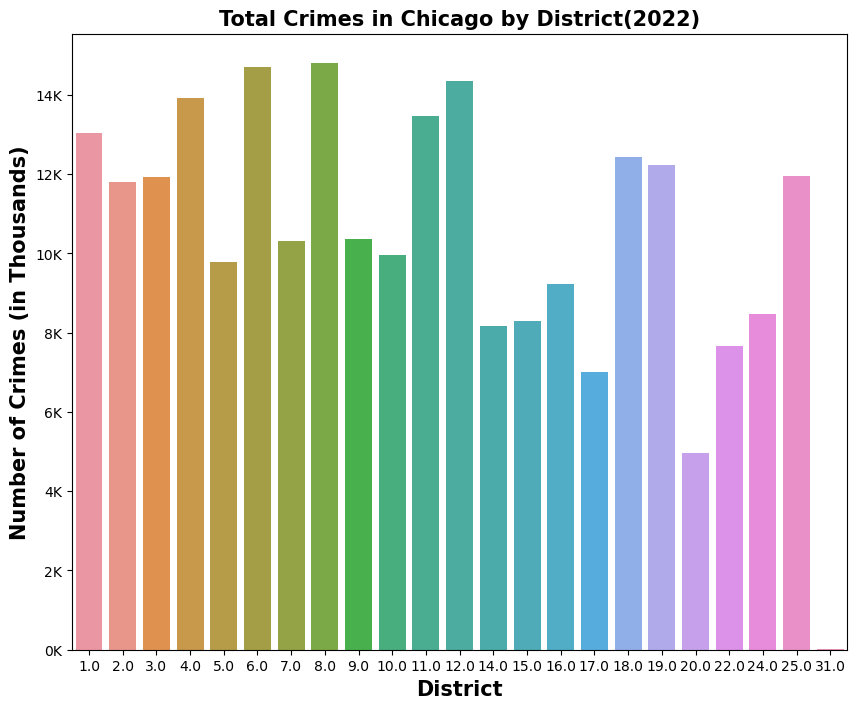

In [10]:
district_crimes = df_district.value_counts()

fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.barplot(x = df_district.index, y = df_district.values)


fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

ax.set_title('Total Crimes in Chicago by District(2022)', fontsize = 15, weight = 'bold')
ax.set_ylabel('Number of Crimes (in Thousands)', fontsize = 15, weight = 'bold')
ax.set_xlabel('District', fontsize = 15, weight = 'bold');


### District 8 has the most crimes and the district with the least is 31.

## Topic 2) Crimes Across the Years:

Is the total number of crimes increasing or decreasing across the years?

Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [11]:
df_years = df.resample('Y').size()

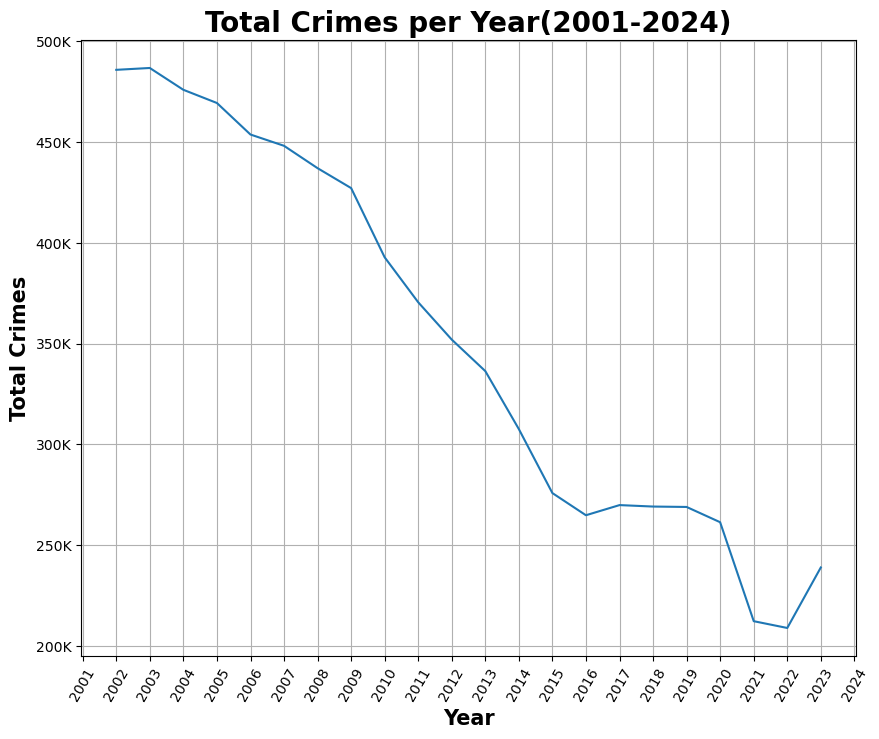

In [12]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.lineplot(x = df_years.index, y = df_years.values)

fmt_thous = mticks.FuncFormatter(thousands)
ax.yaxis.set_major_formatter(fmt_thous)

major_ticks_loc = mdates.YearLocator(1)
major_ticks_format = mdates.DateFormatter('%Y')
x_years = pd.date_range(start = '2001', end = '2024', freq = 'AS')
plt.xticks(x_years, [year.year for year in x_years])

plt.xticks(rotation = 60)
ax.grid()

ax.set_title('Total Crimes per Year(2001-2024)', fontsize = 20, weight = 'bold')
ax.set_ylabel('Total Crimes', fontsize = 15, weight = 'bold')
ax.set_xlabel('Year', fontsize = 15, weight = 'bold');

### The total number of crimes are decreasing per year

In [13]:
indiv_crimes = df.groupby('Primary Type').resample("Y").size()
indiv_crimes

Primary Type       Date      
ARSON              2001-12-31    1011
                   2002-12-31    1032
                   2003-12-31     955
                   2004-12-31     778
                   2005-12-31     691
                                 ... 
WEAPONS VIOLATION  2018-12-31    5456
                   2019-12-31    6339
                   2020-12-31    8432
                   2021-12-31    8980
                   2022-12-31    8766
Length: 723, dtype: int64

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

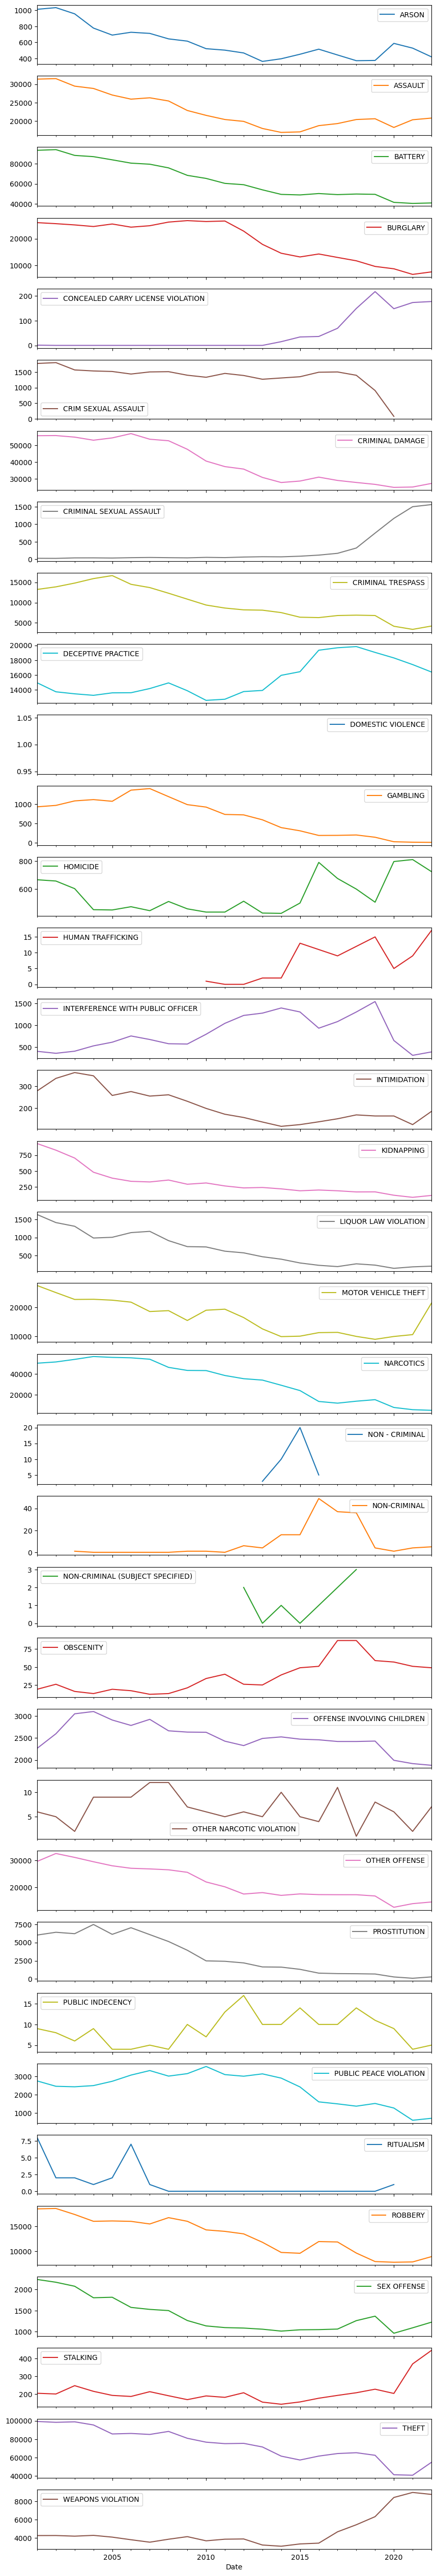

In [14]:
indiv_crimes.unstack().T.plot(subplots=True, figsize = (10,65))

### A few crimes are increasing and they are :
  - Concealed Carry License Violation
  - Criminal Sexual Assault
  - Deceptive Practice
  - Homicide
  - Human Trafficking
  - Obscenity
  - Stalking
  - Weapons Violation

## Topic 3) Comparing AM vs. PM Rush Hour:

##### Are crimes more common during AM rush hour or PM rush hour?

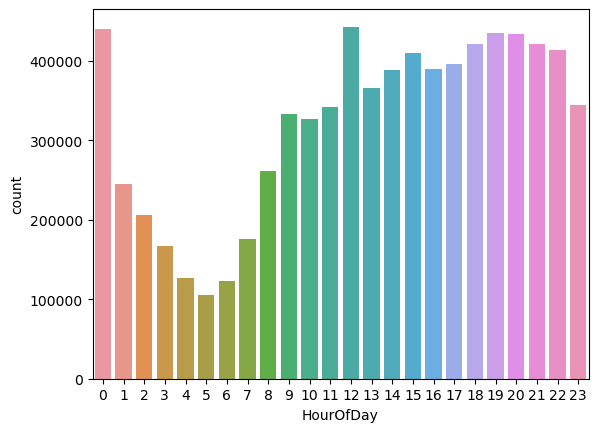

In [15]:
df['HourOfDay'] = df.index.hour
sns.countplot(data=df, x='HourOfDay');

### Crimes are more common in the PM Rush

##### What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

In [16]:
crimes_by_hour = df.groupby("HourOfDay")['Primary Type'].value_counts(normalize=False)
crimes_by_hour

HourOfDay  Primary Type                    
0          THEFT                               91882
           BATTERY                             71777
           CRIMINAL DAMAGE                     64386
           DECEPTIVE PRACTICE                  40410
           OTHER OFFENSE                       27799
                                               ...  
23         PUBLIC INDECENCY                        6
           NON-CRIMINAL                            4
           RITUALISM                               3
           HUMAN TRAFFICKING                       1
           NON-CRIMINAL (SUBJECT SPECIFIED)        1
Name: Primary Type, Length: 800, dtype: int64

In [17]:
am_rush = crimes_by_hour.loc[7]+crimes_by_hour.loc[8]+crimes_by_hour.loc[9]+crimes_by_hour.loc[10]
am_rush

Primary Type
ARSON                                  1139
ASSAULT                               73636
BATTERY                              158475
BURGLARY                              96219
CONCEALED CARRY LICENSE VIOLATION       157
CRIM SEXUAL ASSAULT                    2567
CRIMINAL DAMAGE                      109089
CRIMINAL SEXUAL ASSAULT                 544
CRIMINAL TRESPASS                     30493
DECEPTIVE PRACTICE                    80006
GAMBLING                                652
HOMICIDE                               1133
HUMAN TRAFFICKING                        19
INTERFERENCE WITH PUBLIC OFFICER       1380
INTIMIDATION                            907
KIDNAPPING                             1649
LIQUOR LAW VIOLATION                    409
MOTOR VEHICLE THEFT                   54035
NARCOTICS                             67032
NON - CRIMINAL                           19
NON-CRIMINAL                             40
OBSCENITY                               145
OFFENSE INVOLVING C

In [18]:
pm_rush = crimes_by_hour.loc[16]+crimes_by_hour.loc[17]+crimes_by_hour.loc[18]+crimes_by_hour.loc[19]
pm_rush

Primary Type
ARSON                                  1523.0
ASSAULT                              118179.0
BATTERY                              288003.0
BURGLARY                              78604.0
CONCEALED CARRY LICENSE VIOLATION       187.0
CRIM SEXUAL ASSAULT                    3874.0
CRIMINAL DAMAGE                      183423.0
CRIMINAL SEXUAL ASSAULT                 824.0
CRIMINAL TRESPASS                     48564.0
DECEPTIVE PRACTICE                    58973.0
GAMBLING                               4905.0
HOMICIDE                               2227.0
HUMAN TRAFFICKING                        12.0
INTERFERENCE WITH PUBLIC OFFICER       4403.0
INTIMIDATION                           1008.0
KIDNAPPING                             2092.0
LIQUOR LAW VIOLATION                   4168.0
MOTOR VEHICLE THEFT                   74678.0
NARCOTICS                            164754.0
NON - CRIMINAL                            5.0
NON-CRIMINAL                             40.0
NON-CRIMINAL (SUBJECT

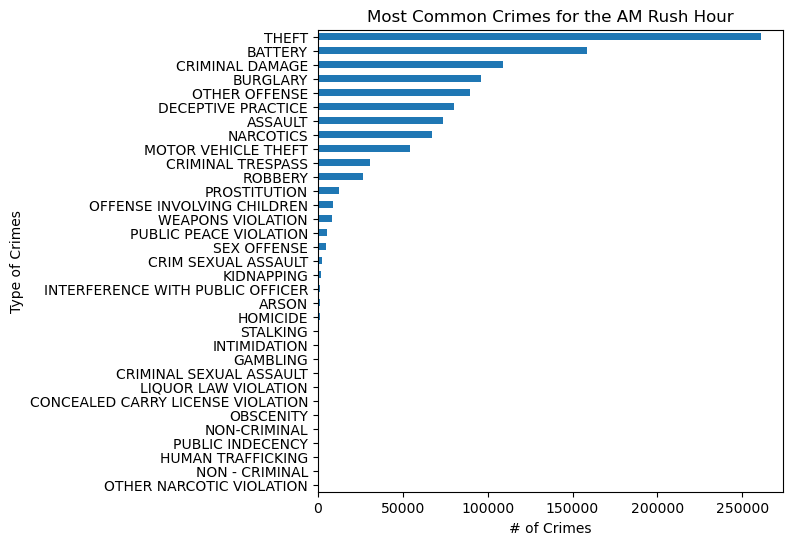

In [19]:
ax = am_rush.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for the AM Rush Hour',xlabel='# of Crimes',ylabel='Type of Crimes');

### The Top 5 most common crimes in the AM Rush are:
  - Theft
  - Battery
  - Criminal Damage
  - Burglary
  - Criminal Damage

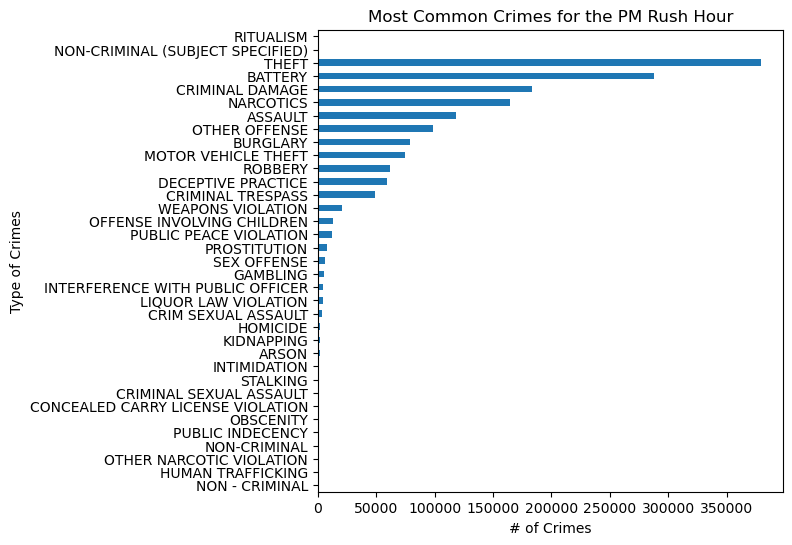

In [20]:
ax = pm_rush.sort_values().plot(kind='barh',figsize=(6,6))
ax.set(title='Most Common Crimes for the PM Rush Hour',xlabel='# of Crimes',ylabel='Type of Crimes');

### The Top 5 most common crimes in the PM Rush are:
  - Theft
  - Battery
  - Criminal Damage
  - Narcotics
  - Assault

##### Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [21]:
am_rush.loc['MOTOR VEHICLE THEFT']

54035

In [22]:
pm_rush.loc['MOTOR VEHICLE THEFT']

74678.0

### Motor Vehicle Theft is more common in the PM than the AM.

# Part 2

In [23]:
import itertools
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
import pmdarima as pm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
# set random seed
SEED = 321
np.random.seed(SEED)

sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize']=(12,3)

In [24]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [25]:
def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [26]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [27]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

## Assault

In [28]:
assault = df[df['Primary Type']== 'ASSAULT']

In [29]:
assault = assault.resample("M").size()
assault.head()

Date
2001-01-31    2123
2001-02-28    2029
2001-03-31    2824
2001-04-30    2746
2001-05-31    2903
Freq: M, dtype: int64

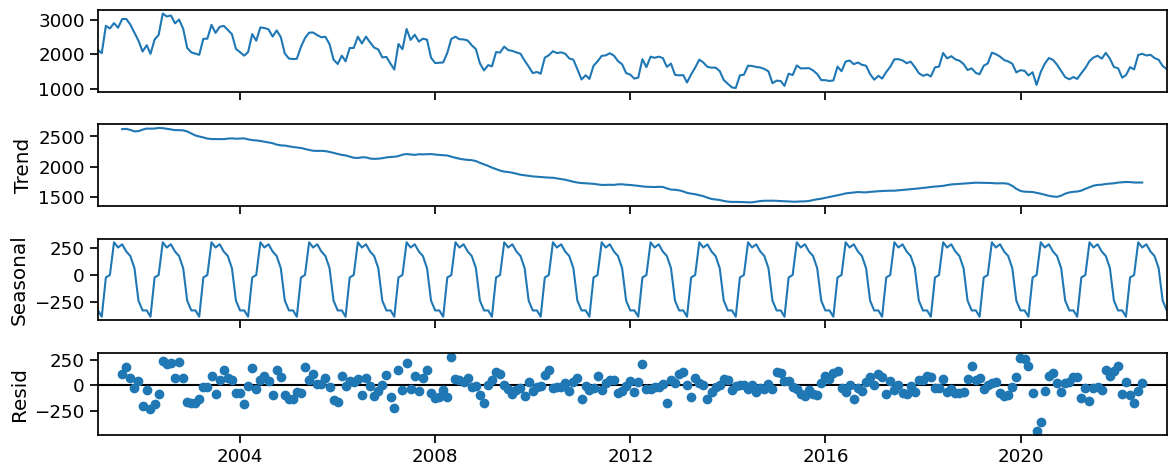

In [30]:
# Apply seasonal decomposition to check for seasonality
decomp = tsa.seasonal_decompose(assault)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [31]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/float(assault.max()-assault.min())* 100:.2f} of the variation time series.")

The seasonal component is 684.8888888888889 which is ~31.75 of the variation time series.


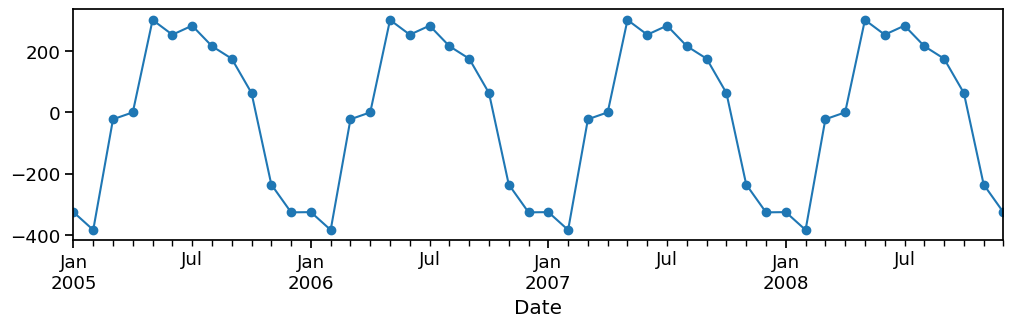

In [32]:
#plot the time series to see the seasonality
seasonal = decomp.seasonal
ax = seasonal.loc['2005': '2008'].plot(marker = 'o')

In [33]:
# Check for stationarity
get_adfuller_results(assault)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.836624,15,248,0.362437,0.05,False


In [34]:
#determine nonseasonal differencing
# determine d
d = ndiffs(assault)
print (f'd = {d}')

d = 1


In [35]:
#determine seasonal differencing
# Determine D
D = nsdiffs(assault, m =12)
print(f'D = {D}')

D = 0


In [36]:
#difference the data
assault_diff = assault.diff().dropna()

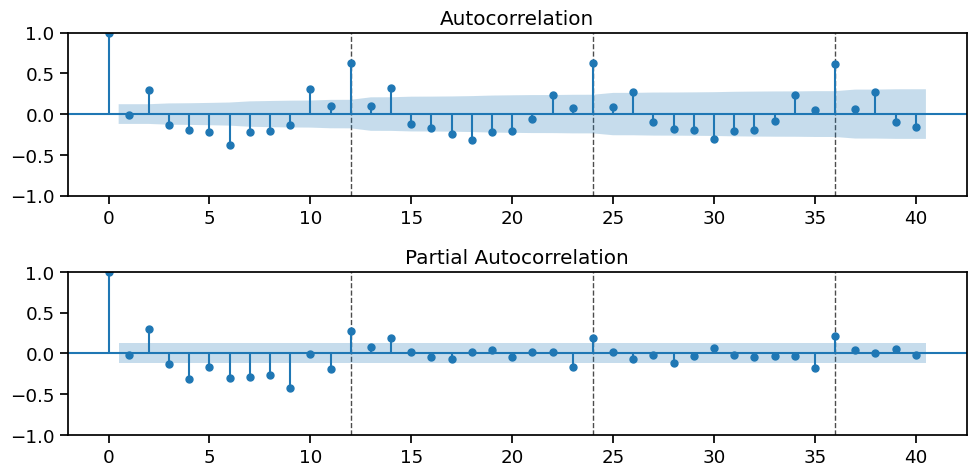

In [37]:
#find the acf and pacf
plot_acf_pacf(assault_diff, annotate_seas=True, m=12);

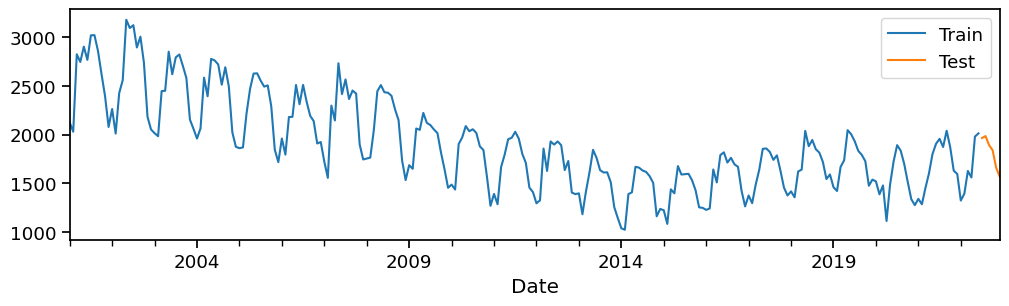

In [38]:
#test train split
atrain, atest = train_test_split(assault, test_size=6)
ax = atrain.plot(label='Train')
atest.plot(ax=ax, label='Test')
ax.legend();

In [39]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(atrain, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 72.666
- MSE = 6,561.620
- RMSE = 81.004
- R^2 = 0.723
- MAPE = 4.04%


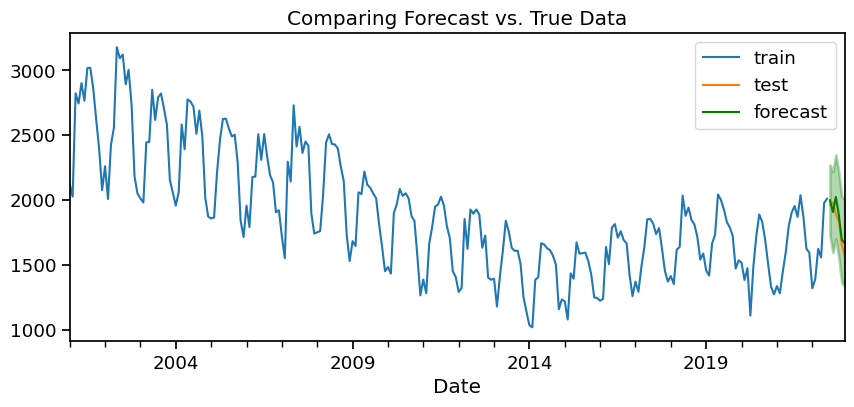

In [40]:
# Obtain summary of forecast as dataframe
aforecast_df = sarima.get_forecast(len(atest)).summary_frame()
# Plot the forecast with true values
plot_forecast(atrain, atest, aforecast_df)
# Obtain metrics
regression_metrics_ts(atest, aforecast_df["mean"])

In [41]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    atrain,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3483.860, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3318.021, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3405.065, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3481.861, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3485.758, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.80 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3404.125, Time=0.22 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.85 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=3337.645, Time=0.12 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=3313.233, Time=0.37 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=3462.085, Time=0.18 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=0.85 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=3

In [42]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(4, 1, 0)x(2, 0, [1, 2], 12)   Log Likelihood               -1586.058
Date:                                 Mon, 22 Jan 2024   AIC                           3192.115
Time:                                         04:37:06   BIC                           3227.606
Sample:                                     01-31-2001   HQIC                          3206.388
                                          - 06-30-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0053      0.515      0.010      0.992      -1.005       1.016
ar.L1         -0.4435      0.058     -7.583      0.000      -0.558      -0.329
ar.L2         -0.2795      0.066     -4.249      0.000      -0.408      -0.151
ar.L3         -0.2492      0.063     -3.951      0.000      -0.373      -0.126
ar.L4         -0.1597      0.063     -2.529      0.011      -0.284      -0.036
ar.S.L12       1.3958      0.211      6.603      0.000       0.981       1.810
ar.S.L24      -0.4033      0.210     -1.920      0.055      -0.815       0.008
ma.S.L12      -1.3308      0.194     -6.854      0.000      -1.711      -0.950
ma.S.L24       0.5555      0.149      3.734      0.000       0.264       0.847
sigma2      1.161e+04    947.664     12.255      0.000    9756.297    1.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                23.83
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

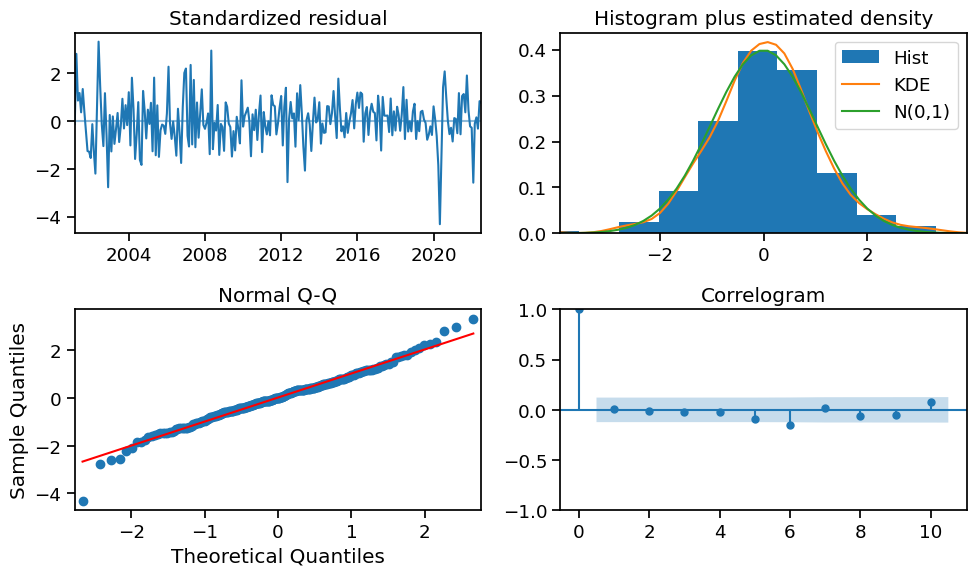

In [43]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 40.024
- MSE = 2,205.093
- RMSE = 46.958
- R^2 = 0.907
- MAPE = 2.24%


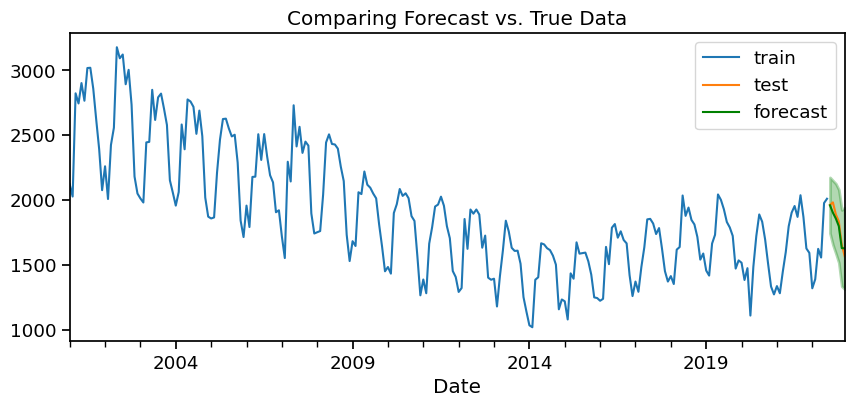

In [44]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    atrain, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
aforecast_df = auto_model.get_forecast(steps=len(atest)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(atrain, atest, aforecast_df);
# Obtain metrics
regression_metrics_ts(atest, aforecast_df['mean'])

In [45]:

# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(assault, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


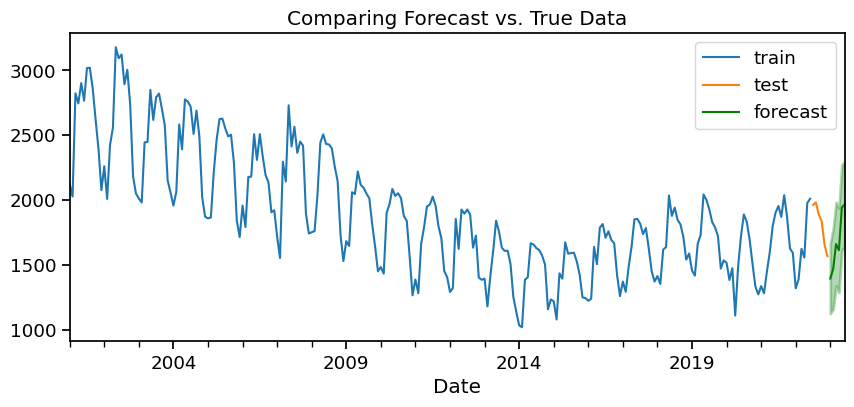

In [46]:
# Obtain future forecasts beyond test data
aforecast_df  = final_model.get_forecast(len(atest)).summary_frame()
plot_forecast(atrain,atest,aforecast_df);

In [47]:
#find the starting and end dates of the forecast
aforecast_df.index[0],aforecast_df.index[-1]

(Timestamp('2023-01-31 00:00:00', freq='M'),
 Timestamp('2023-06-30 00:00:00', freq='M'))

In [48]:

#define the starting value of the forecast
starting_value = aforecast_df['mean'].iloc[0]
starting_value

1397.2003893147078

In [49]:
#define the final value of the forecast
final_value = aforecast_df['mean'].iloc[-1]
final_value

1970.0732703231054

In [50]:
#define the change in values
change = final_value - starting_value
change

572.8728810083976

In [51]:
#calculate this change as a percentage
perc_change = (change / starting_value) * 100
perc_change

41.00148306495803

## Theft

In [52]:
theft = df[df['Primary Type']== 'THEFT']

In [53]:
theft = theft.resample("M").size()
theft.head()

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
Freq: M, dtype: int64

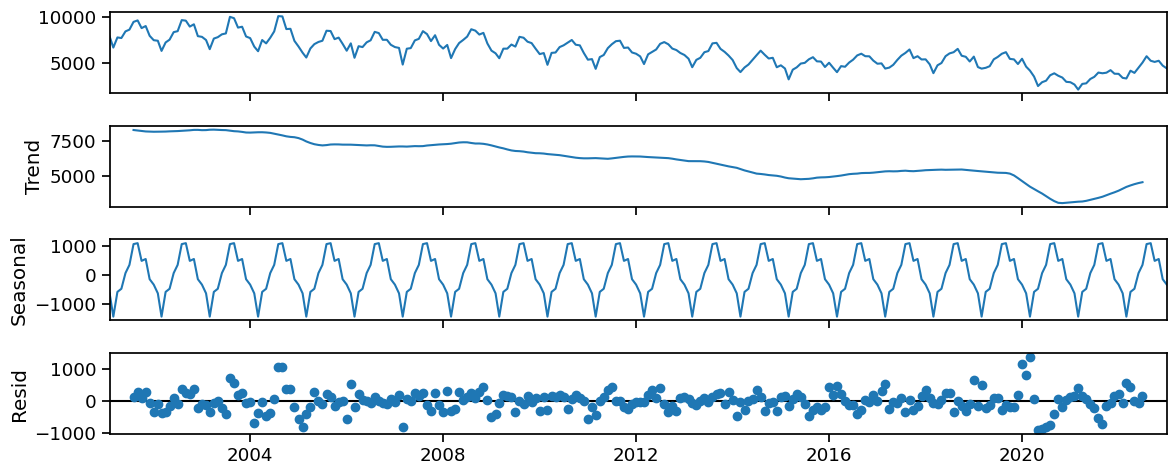

In [54]:
# Apply seasonal decomposition to check for seasonality
decomp = tsa.seasonal_decompose(theft)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [55]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/float(theft.max()-theft.min())* 100:.2f} of the variation time series.")

The seasonal component is 2549.9880952380954 which is ~32.08 of the variation time series.


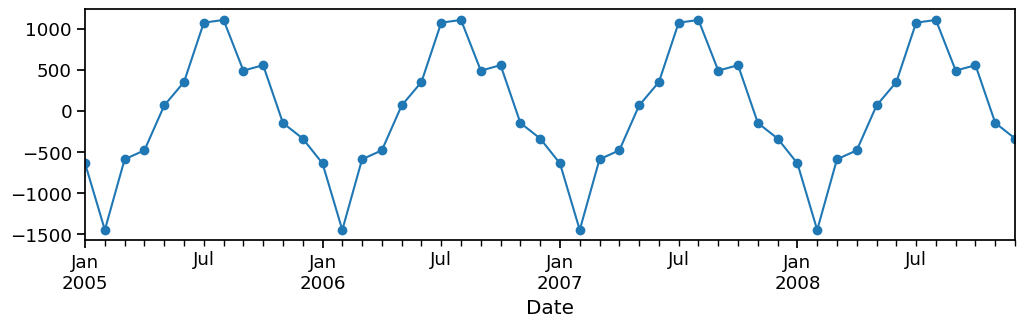

In [56]:
#plot the time series to see the seasonality
seasonal = decomp.seasonal
ax = seasonal.loc['2005': '2008'].plot(marker = 'o')

In [57]:
# Check for stationarity
get_adfuller_results(theft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.393935,13,250,0.58518,0.05,False


In [58]:
# determine d
d = ndiffs(theft)
print (f'd = {d}')
# determine D
D = nsdiffs(theft, m = 12)
print (f'D = {D}')

d = 1
D = 0


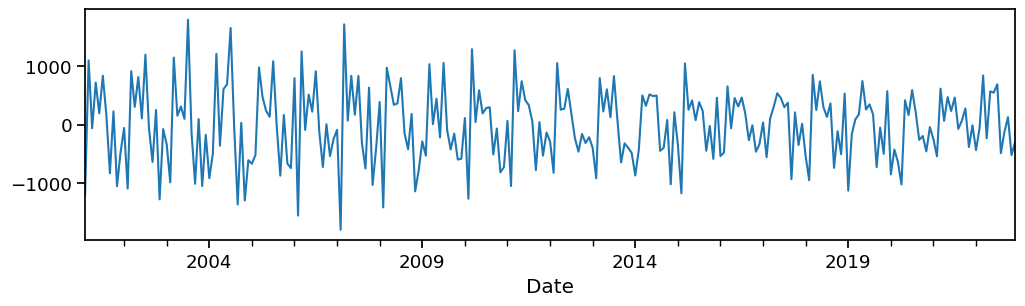

In [59]:
#apply the differencing
n_diff = theft.diff().dropna()
n_diff.plot();

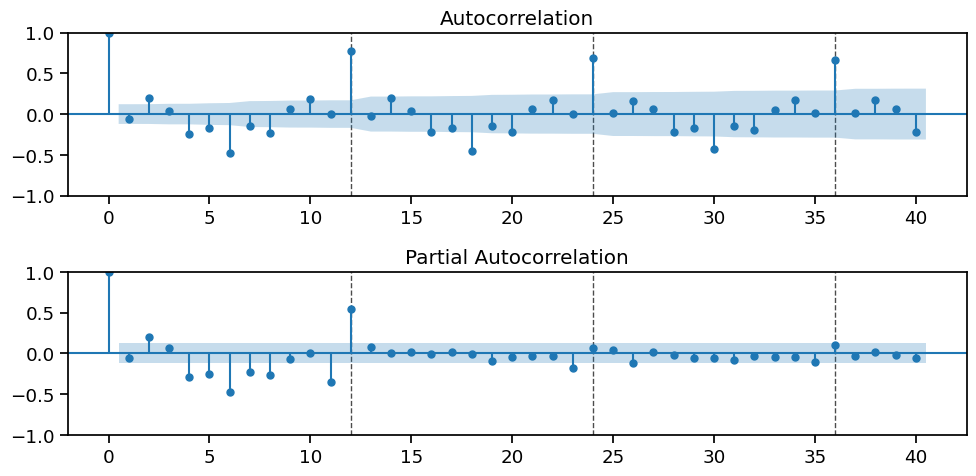

In [60]:
# now look at the acf/pacf of the stationary data
plot_acf_pacf(n_diff, annotate_seas = True, m = 12);

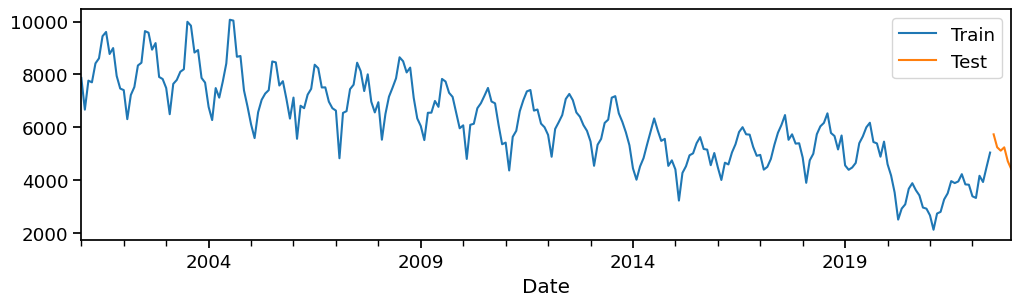

In [61]:
# tts
train, test = train_test_split(theft, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [62]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                                y   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood               -1874.777
Date:                          Mon, 22 Jan 2024   AIC                           3759.554
Time:                                  04:37:16   BIC                           3777.300
Sample:                              01-31-2001   HQIC                          3766.691
                                   - 06-30-2022                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9989      1.759      0.568      0.570      -2.449       4.446
ma.L1         -0.9988      1.619     -0.617      0.537      -4.172       2.174
ar.S.L12       0.9604      0.012     79.962      0.000       0.937       0.984
ma.S.L12      -0.6120      0.051    -11.996      0.000      -0.712      -0.512
sigma2      1.166e+05   1.61e+04      7.248      0.000    8.51e+04    1.48e+05
===================================================================================
Ljung-Box (L1) (Q):                  10.57   Jarque-Bera (JB):                11.91
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.68   Skew:                            -0.23
Prob(H) (two-sided):                  0.07   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

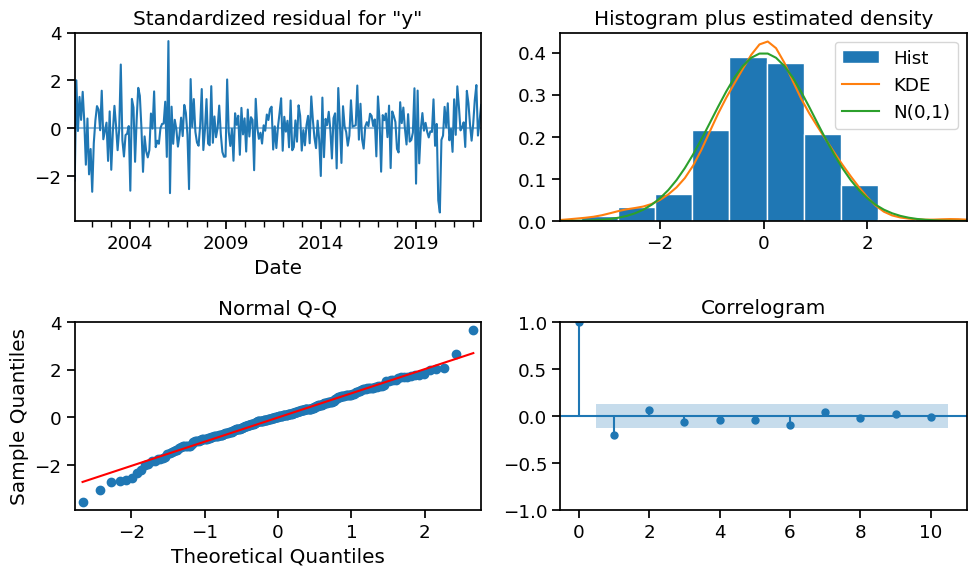

In [63]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 263.781
- MSE = 97,389.395
- RMSE = 312.073
- R^2 = 0.448
- MAPE = 5.38%


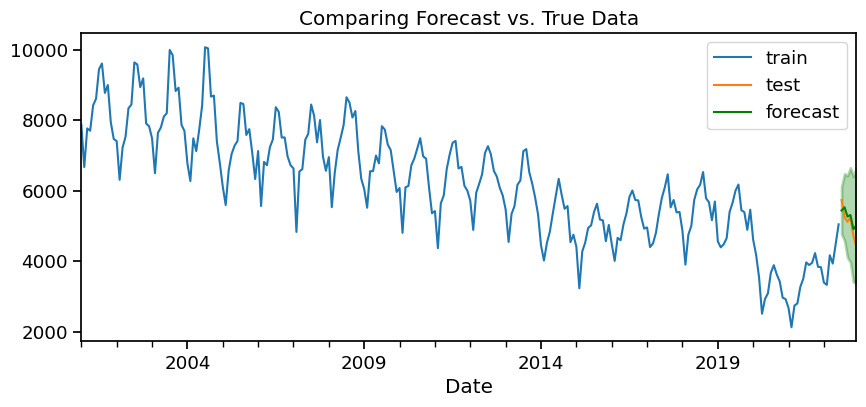

In [64]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [65]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=0.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.04 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=0.54 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3743.907, Time=1.40 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=0.59 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.50 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.900, Time=1.22 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=0.53 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=0.19 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=0.97 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

In [66]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  258
Model:             SARIMAX(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.634
Date:                                 Mon, 22 Jan 2024   AIC                           3741.268
Time:                                         04:37:43   BIC                           3759.013
Sample:                                     01-31-2001   HQIC                          3748.404
                                          - 06-30-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2251      0.046     -4.934      0.000      -0.315      -0.136
ar.S.L12       0.9778      0.008    120.048      0.000       0.962       0.994
ma.S.L12      -0.5771      0.059     -9.815      0.000      -0.692      -0.462
ma.S.L24      -0.1202      0.068     -1.758      0.079      -0.254       0.014
sigma2      1.038e+05   7353.299     14.120      0.000    8.94e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                30.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.44
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

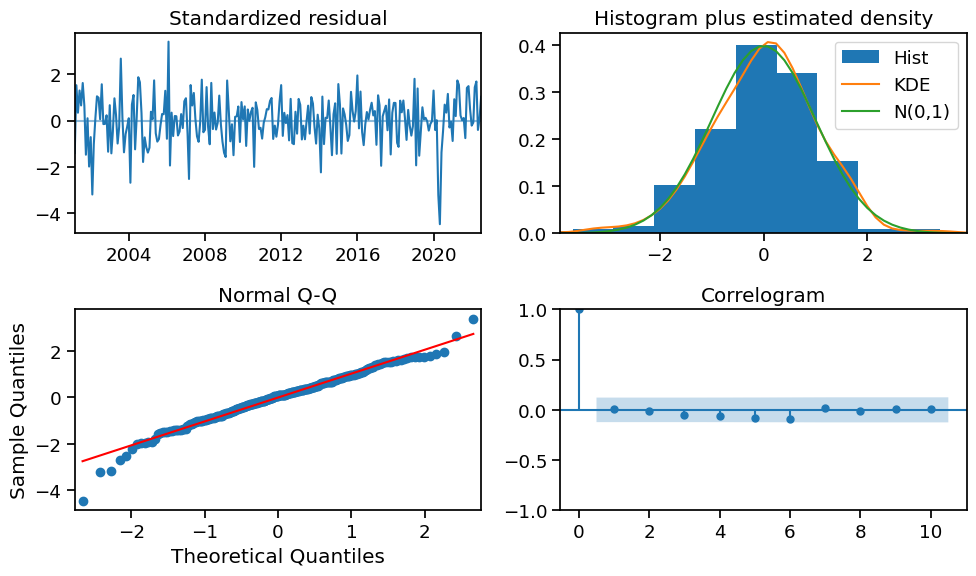

In [67]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 211.162
- MSE = 72,806.759
- RMSE = 269.827
- R^2 = 0.587
- MAPE = 4.27%


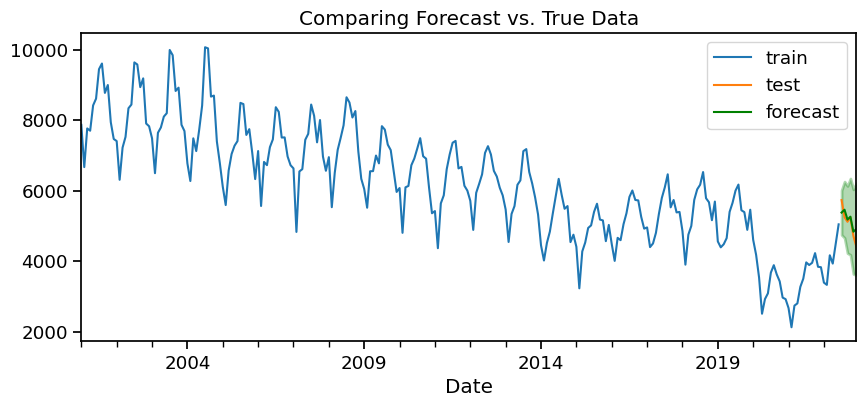

In [68]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [69]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 4  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(theft, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

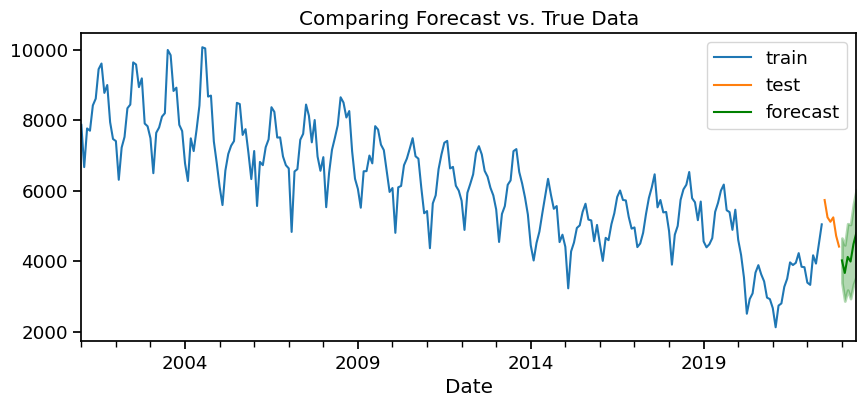

In [70]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

#find the starting and ending dates of the forecast
forecast_df.index[0],forecast_df.index[-1]

In [71]:
#define the starting value of the forecast
starting_value = forecast_df['mean'].iloc[0]
starting_value

4021.240826151611

In [72]:
#define the ending value of the forecast
final_value = forecast_df['mean'].iloc[-1]
final_value

4800.37570035827

In [73]:
#calculate the change in values
change = final_value - starting_value
change

779.1348742066584

In [74]:
#calculate the change as a percentage
perc_change = (change / starting_value) * 100
perc_change

19.375484033178445

## Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
  - Theft has the highest amount of crimes.

## Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?

  - Theft has the highest net change.

## Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?
  - Assault has the highest percent change.

## What recommendation would you make to the stakeholders?
  - I recommend putting more resources towards assault even though both crimes are rising assault has a bigger change and is a more dangerous crime.

## Include reporting-quality visual(s) to support your recommendation.

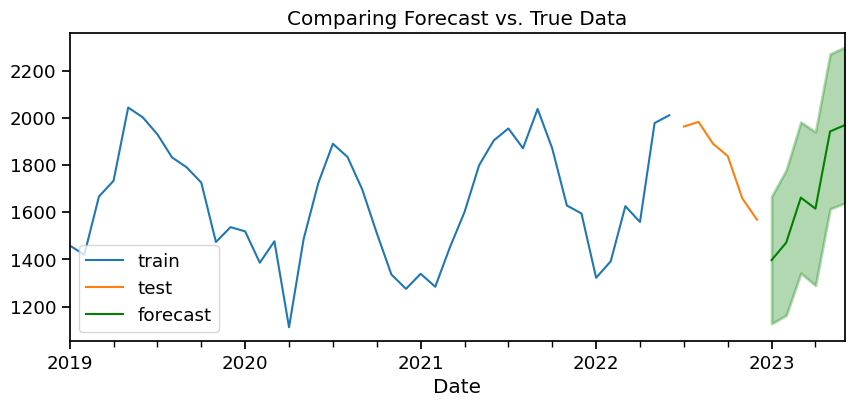

In [75]:
# This is Theft forecast
plot_forecast(atrain.loc['2019':],atest,aforecast_df);

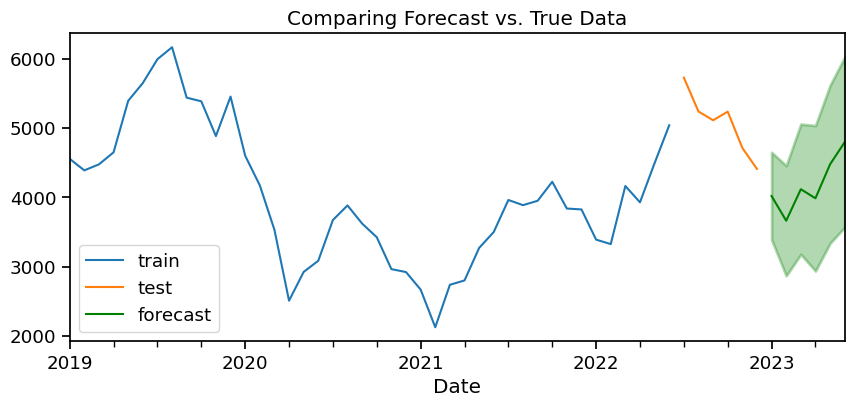

In [76]:
# This is Assault forecast
plot_forecast(train.loc['2019':],test,forecast_df);